# Le perceptron

Explication la plus compréhensible ici https://ichi.pro/fr/perceptron-explication-implementation-et-un-exemple-visuel-66582574588625

Mais j,ai implementé à partir d'ici: https://ichi.pro/fr/implementation-de-l-algorithme-d-apprentissage-perceptron-pour-resoudre-et-passer-en-python-158557679913775

Il faudrait le refaire

Autre tutoriel:

https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/

https://ichi.pro/fr/perceptron-explication-implementation-et-un-exemple-visuel-66582574588625

https://www.pycodemates.com/2022/12/perceptron-algorithm-understanding-and-implementation-python.html (bien pour activation)

## todo

reprendre tout: description précise dans le test qui marche avec une seule dimension Autre test basique - ça marche

puis partie finale reprise de github https://github.com/jtris/one-layer-perceptron/blob/main/perceptron.py

Expliquer activation z, bias etc.




Le perceprton est une des formes les plus simples d'aprentissage machine. L'idée est d'avoir un algorithme qui soit capable, à partir d'un input, de fournir une prédiction. Typiquement admettons d'avoir comme input une série de chiffres et de vouloir savoir, comme output si ces chiffres sont paires ou impairs

L'algorithme du perceptron a été inventé en 1958 par Frank Rosenblatt.

Le perceptron permet de tracer une division dans un set de données pour les classer:

![](perceptron1.png)

Le percepron prend une valeur x et la multiplie par un poids w et donne une prédiction: si `x*w` < 0 la prédiction est négative, sinon elle est positive.

Par exemple si x = 1 et w = -1 le résultat sera -1 et donc la prédiction négative.



Maintenant il faut passer à la phase d'aprentissage. Pour ce faire il nous faut un corpus d'entraînement avec des valeurs libellés. Dans ce cas on aura les libellés -1 (négatif) et +1 (positif):

Par exemple x = 1 ; prédiction = positif (donc +1)

Cela signifie que la première prédition du perceptron est fausse. Pour faire apprendre le perceptron nous nous baserons sur la règle suivante:


```
if y(x*w) ≤ 0:
  w = w + yx
```

Ici y est notre libellé.

Reprenons notre exemple où x = 1 et w = -1 et y = 1

On aura:

if 1(1*-1)≤ 0: # et la condition est respecté, donc on applique la fonction suivante)
  w = -1 + 1 = 0
  
De cette manière on aura corrigé le poid à 0. Si on réitère, maintenant on aura:

if 1(1*0)≤ 0: # et la condition est encore une fois respecté, donc on applique la fonction suivante)
  w = 0 + 1 = 1

Maintenant w sera 1 et donc la prédiction (`x*w`) sera 1, ce qui correspond au libelé.

La règle nous a donc permis de bien corriger le poids. Évidemment la condition de la règle permet de changer le poids si et seulement si la prédiction est différente du libellé.



On rajoute un biais:

![](perceptron3.png)

>But you may be noticed that one of the inputs to the perceptron is zero, this might not be good sometimes since it will affect the training process. If you try to change the weights, it will not make any effect since the input is still zero. Here we need to add a new term to the equation which is known as bias. Bias will help to shift the activation to the left or right during the training of the Perceptron algorithm. https://www.pycodemates.com/2022/12/perceptron-algorithm-understanding-and-implementation-python.html


Différents types d'activation:  Heaviside function, Sigmoid function, ReLU function ET softmax pour probabilité

## Un exemple: la porte ET LAISSER TOMBER

https://ichi.pro/fr/implementation-de-l-algorithme-d-apprentissage-perceptron-pour-resoudre-et-passer-en-python-158557679913775

Admettons de vouloir créer un classificateur qui définisse la porte Et (à savoir le produit de chaque entrée). Nous aurons les données suivantes:

[0,0], [0,1], [1,0], [1,1]

libellées de la manière suivante:

0, 0, 0, 1

(Car `0*0=0, 1*0=0, 0*1=0 et 1*1=1`)

Voici la représentation graphique des points que nous voulons séparer:

![](perceptron2.png)

In [1]:
import numpy as np
w = np.random.rand(1,3) * 10 # 3 chiffres aléatoire
w_1 = np.round(w[0][0], 1)
w_2 = np.round(w[0][1], 1)
theta = np.round(w[0][2], 1)

x = [ [0,0], [0,1], [1,0], [1,1]]
x_array = np.asarray(x)
#  outputs attendu (la prte ET est le produit de chaque ligne de la matrice, donc 0*0=0, 1*0=0, 0*1=0 et 1*1=1
out = x_array[:, 1] * x_array[:, 0]

#step function 
def step (net):
    if net >= 0:
        return 1
    else:
        return 0


La prédiction du perceptron sera donc:

In [2]:
step(np.dot(np.asarray([w_1, w_2]) , x[0])  + theta) # pour la première valeur, à savoir x[0]

1

In [3]:
for v in x:
    print('w_1 aléatoire = '+ str(w_1) + ' theta aléatoire = ' + str(theta) + ' Résultat aléatoire pour la valeur '  + str(v)+ ' = '+ str(step(np.dot(np.asarray([w_1, w_2]) , v)  + theta)))

w_1 aléatoire = 1.6 theta aléatoire = 1.2 Résultat aléatoire pour la valeur [0, 0] = 1
w_1 aléatoire = 1.6 theta aléatoire = 1.2 Résultat aléatoire pour la valeur [0, 1] = 1
w_1 aléatoire = 1.6 theta aléatoire = 1.2 Résultat aléatoire pour la valeur [1, 0] = 1
w_1 aléatoire = 1.6 theta aléatoire = 1.2 Résultat aléatoire pour la valeur [1, 1] = 1


Avec des w aléatoires et theta aléatoire les résultats sont faux. On peut calculer l'erreur comme suit:


In [4]:
error = np.array([0,0,0,0])
for i in range(len(x)):
    f_net = step(np.dot(np.asarray([w_1, w_2]) , x[i])  + theta) #
    error[i] = out[i] - f_net
E = np.sum(error)
print(E)

-3


Nousa allons donc utiliser notre algorithme:
    
```
if y(x*w) ≤ 0:
  w = w + yx
```

Pour corriger w1 et w2 (et le biais theta) et avoir les bons résultats. Nous allons le faire avec 1000 itérations

In [5]:
#the error vector 
error = np.array([0,0,0,0])
for i in range(len(x)):
    f_net = step(np.dot(np.asarray([w_1, w_2]) , x[i])  + theta)
    error[i] = out[i] - f_net
E = np.sum(error)
print(E)

max_it = 1000
t = 1
learning_rate=0.1
vals = [[w_1, w_2, theta]]
while t < max_it & E != 0:
    for i in range(len(x)):
        f_net = step(np.dot(np.asarray([w_1, w_2]) , x[i])  + theta)
        error[i] = out[i] - f_net
        w_1 = w_1 + learning_rate * error[i] * x[i][0]
        w_2 = w_2 + learning_rate * error[i] * x[i][1]
        theta = theta + learning_rate*error[i]
    
    vals.append([w_1, w_2, theta])
    E = np.sum(error)
   # print('sum of errors', E)
    t = t+1

for i in range(len(x)):
        f_net = step(np.dot(np.asarray([w_1, w_2]) , x[i])  + theta)
        error[i] = out[i] - f_net

w_1 = w_1 + learning_rate * error[i] * x[i][0]
w_2 = w_2 + learning_rate * error[i] * x[i][1]
theta = theta + learning_rate*error[i]

vals.append([w_1, w_2, theta])
E = np.sum(error)


-3


In [6]:
for v in x:
    print('w_1 aléatoire = '+ str(w_1) + ' theta aléatoire = ' + str(theta) + ' Résultat aléatoire pour la valeur '  + str(v)+ ' = '+ str(step(np.dot(np.asarray([w_1, w_2]) , v)  + theta)))

w_1 aléatoire = 0.7999999999999997 theta aléatoire = -1.4000000000000001 Résultat aléatoire pour la valeur [0, 0] = 0
w_1 aléatoire = 0.7999999999999997 theta aléatoire = -1.4000000000000001 Résultat aléatoire pour la valeur [0, 1] = 0
w_1 aléatoire = 0.7999999999999997 theta aléatoire = -1.4000000000000001 Résultat aléatoire pour la valeur [1, 0] = 0
w_1 aléatoire = 0.7999999999999997 theta aléatoire = -1.4000000000000001 Résultat aléatoire pour la valeur [1, 1] = 1


## je reessaye from sratch et ça marche pas car problème de poids

In [7]:
import numpy as np
w = np.random.rand(1,2) * 10 # 2 chiffres aléatoire
w_1 = np.round(w[0][0], 1)
w_2 = np.round(w[0][1], 1)


x = [ [0,0], [0,1], [1,0], [1,1]]
x_array = np.asarray(x)
#  outputs attendu (la prte ET est le produit de chaque ligne de la matrice, donc 0*0=0, 1*0=0, 0*1=0 et 1*1=1
out = x_array[:, 1] * x_array[:, 0]

#fonction de prédiction: si c'est positif la prédiction est 1, sinon c'est 0

def prediction(value):
    net= np.dot(np.asarray([w_1, w_2]), value) # produit des deux vecteurs x et w 
    if net >= 0:
        return 1
    else:
        return 0


   

In [8]:
prediction(x[2])

1

Maintenant ma fonction d'aprentissage:

```
if y(x*w) ≤ 0:
  w = w + yx
```

Pour chaque valeur de x (x[0], x[1], x[2], x[3]) j'ai une prédiction `x*w`, basée sur un w aléatoire. je vais la multiplier par la prédiction (out[0:3]) et si ce produit est ≤ 0, je vais changer w. faisons-le 10 fois pour commencer

In [9]:
for a in range(10):
    if np.dot(np.dot(np.asarray([w_1, w_2]), x[0]), out[0])<=0:
        print(np.dot(np.dot(np.asarray([w_1, w_2]), x[0]), out[0]))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [10]:
x[0]

[0, 0]

In [11]:
out[0]

0

In [12]:
w_1

6.5

# Autre test basique - ça marche

In [13]:
inputs = [1,3,5,7] # x
labels = [-1,-1,-1,1] #y
weights = [30,2,4,-5]




In [14]:
def prediction(a):
    if inputs[a]*weights[a] <=0: #activation
        return -1
    else:
        return 1
    

In [15]:
[prediction(i) for i, value in enumerate(inputs)]

[1, 1, 1, -1]

In [16]:
nw = []
for n, value in enumerate(inputs):
    w = weights[n]
    for a in range(30):
        if labels[n] * inputs[n] * w <= 0:
            #print(weights[0])
            w = w + labels[n] * inputs[n]
            
    print(w)
    nw.append(w)


0
-1
-1
2


In [17]:
def new_prediction(a):
    if inputs[a]*nw[a] <=0:
        return -1
    else:
        return 1

In [18]:
[new_prediction(i) for i, value in enumerate(inputs)]

[-1, -1, -1, 1]

## encore tests

Ça c'est pour 1 dimension, donc 1 caractéristique. Il faut le faire pour les différentes caractéristiques.

```
if y(x*w) ≤ 0:
  w = w + yx
```

ou y est le label (1 chiffre) et x et w sont des vecteurs.

Essayons de le faire avec quelque chose de plus complexe, par exemple des animaux classés comme suit

caractéristiques oreilles pointues, vit la nuit, fidel, 

et on veut savoir si c'est un chien (+1) ou pas (-1)

Corpus d'entraînement

a1 [1,0,1] label 1
a2 [0,0,1] label 1
a3 [1,1,0] label -1
a4 [1,1,1] label 1

on voudra ensuite deviner
a5 [0,1,1]





In [19]:
inputs = [[1,0,1],[0,0,1],[1,1,0],[1,1,1]]
labels = [1,1,-1,1] #y
weights = [3,1,-1]
bias = 0
#x*w =z : c'est chaque vecteur animal multiplié par le vecteur poids
learning_rate=0.1
# donc pour [1,0,1] c'est (1*3+0*1+1*-1)

def z(item):
    return sum([a*weights[i] for i,a in enumerate(item)])+bias

# heaviside activation function
def activation(z):
    if z <=0:
        return -1
    else:
        return 1

In [20]:
activation(z(inputs[0]))

1

In [21]:
[activation(z(inputs[i])) for i, value in enumerate(inputs)]

[1, -1, 1, 1]

In [22]:
def train(minput,weights,bias,labels):
    for epoch in range(10):
            
            # Traversing through the entire training set
            for i in range(len(minput)):
                z = np.dot(minput, weights) + bias # Finding the dot product and adding the bias
                y_pred = activation(z) # Passing through an activation function
                
                #Updating weights and bias
                weights = weights + learning_rate * (labels[i] - y_pred[i]) * minput[i]
                bias = bias + learning_rate * (labels[i] - y_pred[i])
                
    return weights, bias

In [23]:
train(inputs[0],weights,bias,labels)

TypeError: 'int' object is not subscriptable

In [171]:
def fit(self, X, y):
        n_features = X.shape[1]
        
        # Initializing weights and bias
        self.weights = np.zeros((n_features))
        self.bias = 0
        
        # Iterating until the number of epochs
        for epoch in range(self.epochs):
            
            # Traversing through the entire training set
            for i in range(len(X)):
                z = np.dot(X, self.weights) + self.bias # Finding the dot product and adding the bias
                y_pred = self.activation(z) # Passing through an activation function
                
                #Updating weights and bias
                self.weights = self.weights + self.learning_rate * (y[i] - y_pred[i]) * X[i]
                self.bias = self.bias + self.learning_rate * (y[i] - y_pred[i])
                
        return self.weights, self.bias

In [172]:
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)

  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://g

ModuleNotFoundError: No module named 'sklearn'

# Truc intéressant qui fonctionne

sur la base de données text_data on entraine le perceptron. cf ici https://github.com/jtris/one-layer-perceptron/blob/main/perceptron.py

Iteration: 1 : RMSE = 0.721
Iteration: 2 : RMSE = 0.555
Iteration: 3 : RMSE = 0.416
Iteration: 4 : RMSE = 0.480
Iteration: 5 : RMSE = 0.392
Iteration: 6 : RMSE = 0.340
Iteration: 7 : RMSE = 0.000

Decision boundary line equation: y = (-2.1x + -6.2) / -(-2.1)


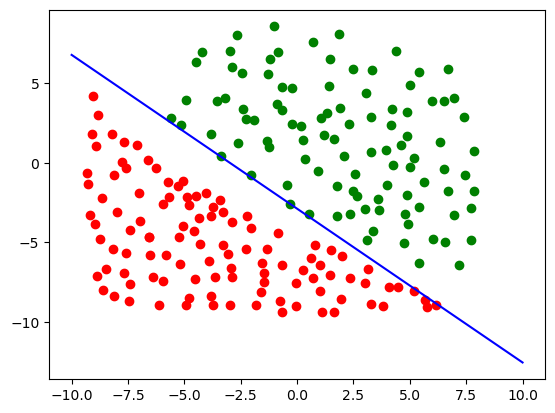

In [191]:
import math
import random
# libraries used for the graph:
import matplotlib.pyplot as plt
import numpy as np


LEARNING_RATE = .1
TOTAL_ITERATIONS = 100

patterns = []

# read data from a file
with open('test_data.txt', 'r') as f:
	while 1:
		line = f.readline().strip().split()
		if not line:
			break
		patterns.append([float(line[0]), float(line[1]), float(line[2])])
'''
patterns[n][0] is the x coordinate
patterns[n][1] is the y coordinate
patterns[n][2] is the correct output (1 or -1)
'''

def calculate_output(weights, bias, x, y):
	output = x * weights[0] + y * weights[1] + bias # z: scalar product entre vecteur input et weights + bias
	return 1 if output >= 0 else -1 #activation


# initialize random values for weights and bias
def init_params():
	weights = [random.random() for i in range(2)]
	bias = random.random()
	return weights, bias


def update_params(weights, bias, err, x, y):
	weights[0] += LEARNING_RATE * err * x
	weights[1] += LEARNING_RATE * err * y
	bias += LEARNING_RATE * err
	return weights, bias


def graph_points():
	# assuming that there will always be a list of patterns called 'patterns'
	for pattern in patterns:
		plt.plot(pattern[0], pattern[1], 'ro' if pattern[2] == 1 else 'go')


def graph_line(x_multiplicand, y_multiplicand, bias):
	x = np.linspace(-10, 10, 100)
	plt.plot(x, (x_multiplicand*x + bias)/-y_multiplicand, '-b')


def gradient_descent():
	# initialize
	weights, bias = init_params()
	global_err = 0

	for iteration in range(TOTAL_ITERATIONS):
		global_err = 0
		# iterate over each pattern
		for pattern in patterns:
			# calculate output and local error
			output = calculate_output(weights, bias, pattern[0], pattern[1])
			local_err = pattern[2] - output
			# set new weights and bias, update global error
			weights, bias = update_params(weights, bias, local_err, pattern[0], pattern[1])
			global_err += local_err**2

		# RMSE = root mean squared error
		rmse = '{:.3f}'.format(math.sqrt(global_err/len(patterns)))
		print(f'Iteration: {iteration+1} : RMSE = {rmse}')

		# break if everything's been predicted correctly
		if global_err == 0:
			break

	'''
	we need to transform the line values to this format: y = mx + b
	0 = x_multiplicand*x + y_multiplicand*y + bias
	=>	y = (x_multiplicand*x + bias)/-y_multiplicand
	'''
	# print the first three digits of each final value
	line_equation = f'y = ({str(weights[0])[:4]}x + {str(bias)[:4]}) / -({str(weights[1])[:4]})'
	print(f'\nDecision boundary line equation: {line_equation}')

	return weights, bias


def main():
	weights, bias = gradient_descent()
	graph_points()
	graph_line(weights[0], weights[1], bias)
	plt.show()


if __name__ == '__main__':
	main()

In [192]:
weights, bias = gradient_descent()

Iteration: 1 : RMSE = 0.734
Iteration: 2 : RMSE = 0.572
Iteration: 3 : RMSE = 0.439
Iteration: 4 : RMSE = 0.480
Iteration: 5 : RMSE = 0.277
Iteration: 6 : RMSE = 0.000

Decision boundary line equation: y = (-1.6x + -5.5) / -(-1.8)


In [194]:
calculate_output(weights, bias, 10, 7)

-1